In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
state = torch.Tensor([10, 20, 0, 1, 0, -1, 0, -1, 0, 1, -1])
state

tensor([10., 20.,  0.,  1.,  0., -1.,  0., -1.,  0.,  1., -1.])

In [3]:
state2 = state.clone()
state2[:2] = torch.flip(state[:2], (0,))
state2[2:][state[2:]>=0] = 1-state[2:][state[2:]>=0]
state2

tensor([20., 10.,  1.,  0.,  1., -1.,  1., -1.,  1.,  0., -1.])

```
before add_noise actions.shape (1, 10)

before add_noise actions [[0.5017605  0.10619526 0.11226608 0.10796383 0.10796707 0.10629854
  0.11431848 0.11433034 0.11272876 0.11793164]]
  
self.noise.sample().shape (1,)

self.noise.sample() [-0.00929737]

after add_noise actions.shape (1, 10)

after add_noise actions [[0.4800407  0.10619526 0.11226608 0.10796383 0.10796707 0.10629854
  0.11431848 0.11433034 0.11272876 0.11793164]]
```

In [4]:
a = [1,2]
b = [3,4]
a + b

[1, 2, 3, 4]

In [5]:
metrics = np.arange(1000)

In [6]:
validate_each = 10

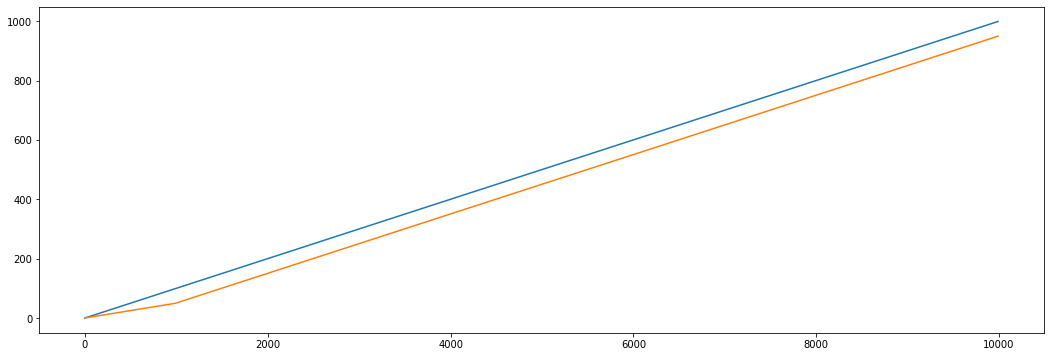

In [7]:
new_index = pd.RangeIndex(start=0, stop=len(metrics)*validate_each, step=validate_each)
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(new_index, metrics)
series = pd.Series(metrics)
series.index = new_index
series.rolling(100, 1).mean().plot(ax=ax, label='MA(100)')
plt.show();

Check if initial networks are the same:

In [8]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is B6DE-218D

 Directory of C:\Users\tiago\dev\ufrj\gambling-tic-tac-toe\src

21/02/2021  01:09    <DIR>          .
21/02/2021  01:09    <DIR>          ..
20/02/2021  11:56    <DIR>          .ipynb_checkpoints
20/02/2021  18:54         5.194.027 animation.gif
20/02/2021  20:40            51.010 animation.mp4
20/02/2021  03:16    <DIR>          controllers
20/02/2021  21:28            21.256 critic_values.mp4
20/02/2021  12:57    <DIR>          drl
09/02/2021  02:30               147 main.py
09/02/2021  02:30    <DIR>          mcts
17/02/2021  20:15    <DIR>          models
20/02/2021  17:58            73.230 test.png
21/02/2021  01:08            39.716 tests-nb.ipynb
20/02/2021  22:23           461.026 train.ipynb
09/02/2021  02:30               567 train.py
21/02/2021  01:02            16.182 train2.ipynb
17/02/2021  20:15               490 utils.py
09/02/2021  02:30    <DIR>          views
09/02/2021  02:30                 0 __in

In [136]:
from drl.model import Actor
from drl.ddpg_agent import DDPGAgent

In [128]:
def equal_nets(model1, model2):
    for p1, p2 in zip(model1.parameters(), model2.parameters()):
        if p1.data.ne(p2.data).sum() > 0:
            return False
    return True

In [132]:
def hard_update(local_model, target_model):
    """Hard update model parameters.
    θ_target = θ_local

    Inputs:
        local_model (PyTorch model): weights will be copied from
        target_model (PyTorch model): weights will be copied to
    """
    for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
        target_param.data.copy_(local_param.data)

In [133]:
actor_local = Actor(11, 1, 9, fc1_units=400, fc2_units=300, seed=0)
actor_target = Actor(11, 1, 9, fc1_units=400, fc2_units=300, seed=2)
equal_nets(actor_local, actor_target)

False

In [134]:
hard_update(actor_local, actor_target)
equal_nets(actor_local, actor_target)

True

In [139]:
agent = DDPGAgent(11, 1, 9, seed=None)
equal_nets(agent.critic_local, agent.critic_target), equal_nets(agent.actor_local, agent.actor_target)

(True, True)

In [26]:
list(actor_local.fc1[0].parameters()) == list(actor_target.fc1[0].parameters())

RuntimeError: Boolean value of Tensor with more than one value is ambiguous